In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# Read in the 2018 lightning strike dataset.
df = pd.read_csv('lightning_strike_dataset1.csv')

In [4]:
# Inspect the first 10 rows.
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [5]:
df.shape

(3401012, 3)

In [6]:
# Get more information about the data, including data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [ ]:
print(df['number_of_strikes'].describe())

In [ ]:
df['number_of_strikes'].isnull().sum()

In [7]:
# Convert date column to datetime
df['date']= pd.to_datetime(df['date'])

In [8]:
# Calculate days with most lightning strikes.
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10) 

,number_of_strikes,center_point_geom
date,,
2018-08-29,1070457,POINT(-85.7 29.1)POINT(-85.6 29.1)POINT(-84.5 ...
2018-08-17,969774,POINT(-80.6 20.3)POINT(-80.5 20.3)POINT(-80.4 ...
2018-08-28,917199,POINT(-108.2 28)POINT(-108.1 28)POINT(-108 28)...
2018-08-27,824589,POINT(-109 24.8)POINT(-108 24.8)POINT(-88.1 24...
2018-08-30,802170,POINT(-75.7 19)POINT(-75.6 19)POINT(-78 20)POI...
2018-08-19,786225,POINT(-73 35)POINT(-103 35)POINT(-101 35)POINT...
2018-08-18,741180,POINT(-110.7 46)POINT(-104.9 46)POINT(-115.1 4...
2018-08-16,734475,POINT(-97 20)POINT(-77 20)POINT(-96.9 20)POINT...
2018-08-31,723624,POINT(-95.2 48.4)POINT(-96 48.1)POINT(-96.1 48...


In [31]:
# Create a new `month` column
df['month'] = df['date'].dt.month

int32


In [36]:
# Create a new `month_txt` column.
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


In [46]:
# Calculate total number of strikes per month
df_by_month = df.groupby(['month','month_txt']).sum(numeric_only=True).sort_values('number_of_strikes', ascending=False).head(12).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,8,Aug,15525255
1,7,Jul,8320400
2,6,Jun,6445083
3,5,May,4166726
4,9,Sep,3018336
5,2,Feb,2071315
6,4,Apr,1524339
7,10,Oct,1093962
8,1,Jan,860045
9,3,Mar,854168


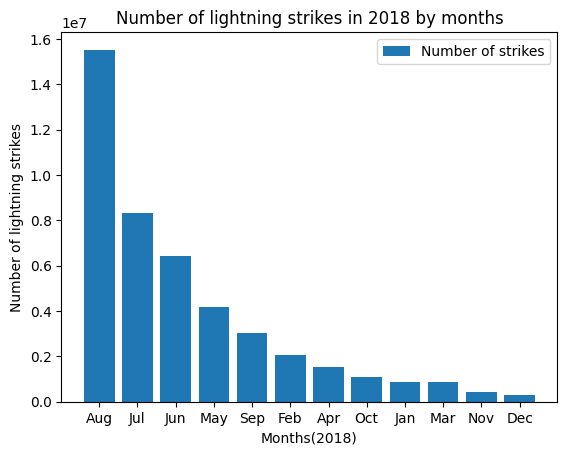

In [50]:
plt.bar(x=df_by_month['month_txt'],height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()